In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.cluster import KMeans 

In [3]:
data = pd.read_csv(r'C:\Users\Dylan\Desktop\ML\MarketData.csv')

In [4]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [5]:
# survey data from a customer survey

In [6]:
# loyalty derived from CLV and churn rate

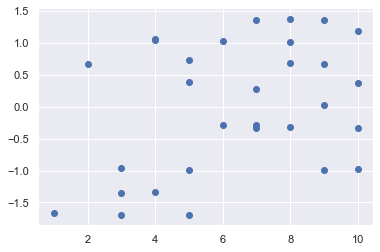

In [7]:
plt.scatter(data['Satisfaction'], data['Loyalty'])

In [29]:
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

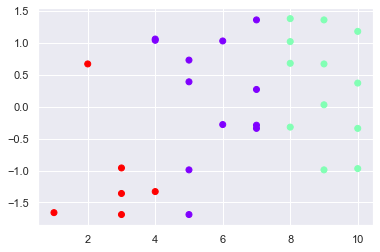

In [28]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')

In [13]:
clusters

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


In [20]:
# Standardize

In [21]:
from sklearn import preprocessing
xscaled = preprocessing.scale(x)

In [24]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(xscaled)
    wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.326631124753926,
 4.430999057496253,
 3.687975963852466]

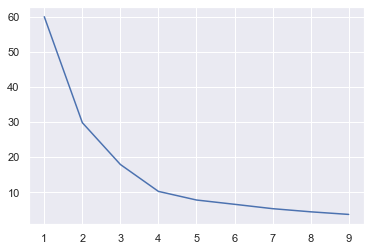

In [26]:
plt.plot(range(1,10),wcss)

In [36]:
clustersN = data.copy()
kmeans_new = KMeans(4)
kmeans_new.fit(xscaled)
clustersN['cluster_pred'] = kmeans_new.fit_predict(xscaled)

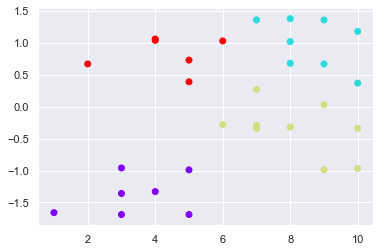

In [50]:
plt.scatter(clustersN['Satisfaction'],clustersN['Loyalty'],c=clustersN['cluster_pred'],cmap='rainbow')